#**Rendimiento de los estudiantes en los exámenes**
###Notas obtenidas por los estudiantes en diversas materias.

**Este conjunto de datos consta de las calificaciones obtenidas por los estudiantes en diversas materias.**

In [43]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

In [25]:
pip install seaborn matplotlib


In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
ruta = "/content/drive/MyDrive/Prueba DIIP Siglo/StudentsPerformance.csv"
students = pd.read_csv(ruta)

###Análisis exploratorio de datos

In [46]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [47]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [48]:
#Se consulta si hay datos nulos
students.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

**No se registran dastos NaN**

In [49]:
# Estadísticas descriptivas para variables numéricas
print(students[['math score', 'reading score', 'writing score']].describe())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


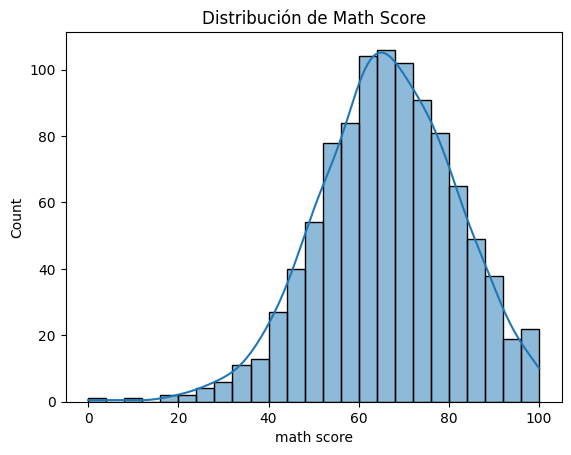

In [50]:
# Visualizar distribuciones de variables numéricas
sns.histplot(students['math score'], kde=True)
plt.title('Distribución de Math Score')
plt.show()

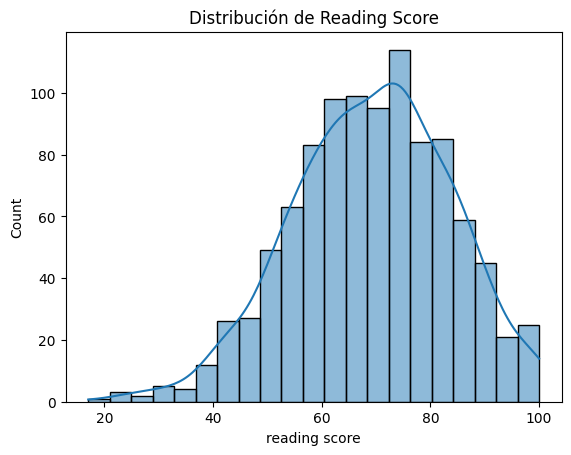

In [51]:
# Visualizar distribuciones de variables numéricas
sns.histplot(students['reading score'], kde=True)
plt.title('Distribución de Reading Score')
plt.show()

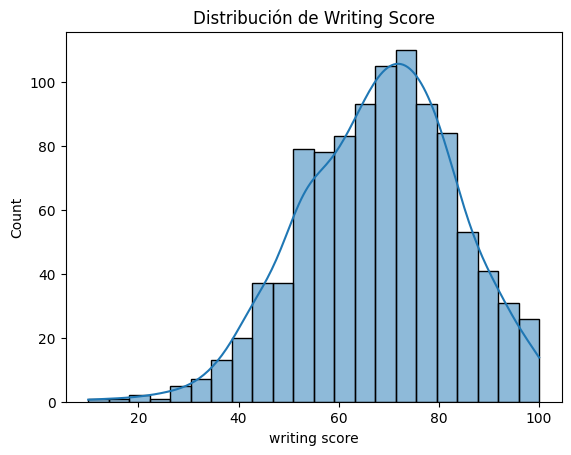

In [52]:
# Visualizar distribuciones de variables numéricas
sns.histplot(students['writing score'], kde=True)
plt.title('Distribución de Writing Score')
plt.show()

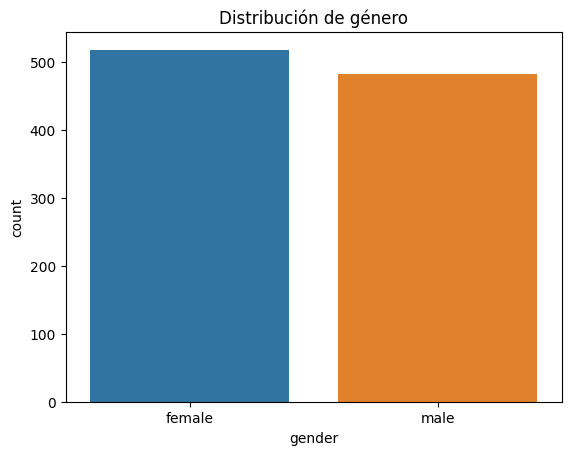

In [53]:

import matplotlib.pyplot       as plt
import seaborn                 as sns
# Gráficos de barras para variables categóricas
sns.countplot(x='gender', data=students)
plt.title('Distribución de género')
plt.show()

<ipython-input-26-de2fe17d82c2>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



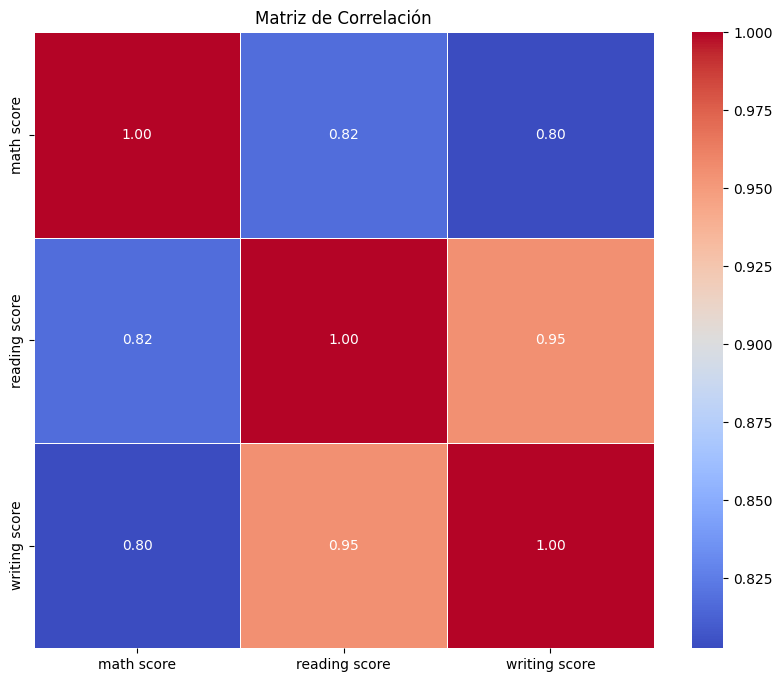

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = students.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Personalizar el diseño del mapa de calor
plt.title('Matriz de Correlación')
plt.show()


**Math Score en Relación al Reading Score (0.817580):**

Hay una correlación positiva fuerte (0.82) entre las puntuaciones de matemáticas y las puntuaciones de lectura.
Esto sugiere que los estudiantes que tienen un buen desempeño en matemáticas también tienden a tener un buen desempeño en lectura.

**Math Score en Relación al Writing Score (0.802642):**

Hay una correlación positiva fuerte (0.80) entre las puntuaciones de matemáticas y las puntuaciones de escritura.
Esto indica que los estudiantes con altas puntuaciones en matemáticas tienden a tener altas puntuaciones en escritura.

**Reading Score en Relación al Writing Score (0.954598):**

Hay una correlación positiva muy fuerte (0.95) entre las puntuaciones de lectura y las puntuaciones de escritura.
Este resultado sugiere que los estudiantes que tienen un buen desempeño en lectura también tienden a tener un buen desempeño en escritura, y viceversa.

**Conclusiones Generales:**

Existe una fuerte correlación positiva entre las puntuaciones de matemáticas y las puntuaciones de lectura y escritura.
La correlación entre las puntuaciones de lectura y escritura es extremadamente fuerte, indicando una relación muy estrecha entre estas habilidades.

###MACHINE LEARNING

In [ ]:
# Construcción de modelos de machine learning
# Regresión lineal para predecir 'math score' en base a 'reading score' y 'writing score'
X = students[['reading score', 'writing score']]
y = students['math score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_regression = LinearRegression()
model_regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicciones
y_pred = model_regression.predict(X_test)

In [ ]:
# Evaluación del modelo de regresión
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

RMSE: 8.788798451027851


Precisión del Modelo:

El valor del RMSE (Root Mean Squared Error) de 8.79 indica la raíz cuadrada de la varianza de los errores de predicción del modelo de regresión. En términos simples, representa cuánto se espera que las predicciones del modelo se desvíen, en promedio, de los valores reales.

Un RMSE de 8.79 indica que, en promedio, las predicciones del modelo están desviadas en alrededor de 8.79 unidades con respecto a las puntuaciones reales de matemáticas.
La interpretación específica puede depender del rango de las puntuaciones de matemáticas en tu conjunto de datos. Por ejemplo, si las puntuaciones oscilan entre 0 y 100, un RMSE de 8.79 podría considerarse aceptable, mientras que si el rango es más pequeño, podría ser menos deseable. Si el RMSE es considerablemente menor que la desviación estándar, podría indicar que el modelo está capturando bien las variaciones en los datos.

###Clasificación con regresión logística para predecir 'gender' en base a otras variables

In [ ]:
# Clasificación con regresión logística para predecir 'gender' en base a otras variables
X_classification = students[['math score', 'reading score', 'writing score']]
y_classification = students['gender']

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

model_classification = LogisticRegression()
model_classification.fit(X_train_clf, y_train_clf)

# Predicciones
y_pred_clf = model_classification.predict(X_test_clf)

In [ ]:
# Evaluación del modelo de clasificación
accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf, average='weighted')
recall = recall_score(y_test_clf, y_pred_clf, average='weighted')
f1 = f1_score(y_test_clf, y_pred_clf, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.895
Precision: 0.8971594551282053
Recall: 0.895
F1 Score: 0.8949816245406136


1. **Accuracy (Precisión Global):**
   - El modelo tiene un accuracy del 89.5%, lo que significa que acierta en predecir el género correctamente en aproximadamente el 89.5% de las instancias del conjunto de prueba.
   - Esta métrica es útil como indicador general de rendimiento, pero puede no ser suficiente en casos de conjuntos de datos desbalanceados.

2. **Precision (Precisión):**
   - La precisión es del 89.72%, lo que indica la proporción de predicciones positivas que fueron correctas.
   - En términos técnicos, es la relación de verdaderos positivos sobre la suma de verdaderos positivos y falsos positivos.
   - Una alta precisión significa que cuando el modelo predice que una observación es de un género específico, es probable que sea correcta.

3. **Recall (Recuperación):**
   - El recall es del 89.5%, lo que indica la proporción de observaciones positivas reales que fueron capturadas por el modelo.
   - En términos técnicos, es la relación de verdaderos positivos sobre la suma de verdaderos positivos y falsos negativos.
   - Un alto recall significa que el modelo es capaz de capturar la mayoría de las instancias positivas.

4. **F1 Score:**
   - El F1 Score es del 89.5%, que es la media armónica de precision y recall.
   - Es útil cuando hay un desequilibrio en las clases, ya que tiene en cuenta tanto los falsos positivos como los falsos negativos.
   - Un F1 Score alto indica un buen equilibrio entre precisión y recall.

Fundamentos técnicos:
- **Precision y Recall:** Estas métricas son particularmente útiles cuando hay desbalance de clases. En tu caso, si el conjunto de datos tiene géneros desbalanceados, es importante considerar tanto la precisión como el recall para obtener una imagen completa del rendimiento del modelo.
  
- **F1 Score:** Es especialmente útil cuando no se quiere favorecer demasiado ni la precisión ni el recall. Si tanto los falsos positivos como los falsos negativos son costosos o problemáticos en tu contexto, el F1 Score proporciona una métrica equilibrada.

- **Interpretación conjunta:** Al considerar todas estas métricas juntas, se observa un rendimiento sólido del modelo. Sin embargo, siempre es importante contextualizar estos resultados según los requisitos específicos de tu aplicación y el conjunto de datos en cuestión.

Recuerda también mencionar cualquier aspecto particular de tus datos o contexto que pueda afectar la interpretación de estos resultados. ¿Te gustaría profundizar en algún aspecto en particular?

###Optimización de hiperparámetros con validación cruzada

In [ ]:
# Optimización de hiperparámetros con validación cruzada
# (Dependiendo de la complejidad del modelo, puede ser necesario ajustar esta parte)
cross_val_score(model_classification, X_classification, y_classification, cv=5, scoring='accuracy')

array([0.855, 0.895, 0.865, 0.895, 0.865])

Consistencia del Modelo:

La precisión del modelo parece ser bastante consistente en los diferentes pliegues, oscilando entre 0.855 y 0.895.
La consistencia indica que el rendimiento del modelo no es muy sensible a la partición específica de los datos.
Promedio de Precisión:

Calcula el promedio de estos valores para obtener una medida general de la precisión del modelo en todos los pliegues.
Promedio = (0.855 + 0.895 + 0.865 + 0.895 + 0.865) / 5 ≈ 0.875
Estabilidad del Modelo:

La variabilidad en los resultados de la validación cruzada puede indicar la estabilidad del modelo. En este caso, la variabilidad es relativamente baja, lo que sugiere una buena estabilidad.
Toma de Decisiones:

La precisión promedio obtenida puede ser considerada como la estimación del rendimiento del modelo en datos no vistos.
Esto te proporciona una referencia sobre qué tan bien generaliza el modelo a nuevos datos.
Ajuste de Hiperparámetros:

Si bien los resultados son consistentes, podrías explorar ajustes adicionales en los hiperparámetros para ver si hay mejoras posibles en la precisión del modelo.